<a href="https://colab.research.google.com/github/RaafiDwi/machine-learning/blob/main/UAS/Dimensionality_Reduction_Method_LDA_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


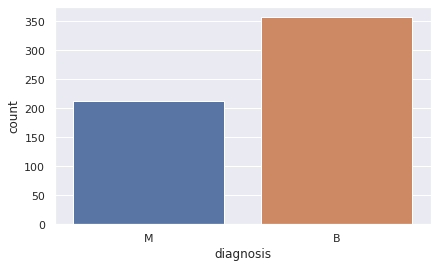

[[66  1]
 [ 2 45]]
0.9736842105263158


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#code for PCA Reduction
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import decomposition
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score,confusion_matrix

df = pd.read_csv("drive/Shareddrives/Neural-Network/data_cancer.csv")


#data = data.drop(columns=['Unnamed: 32'])
sns.countplot(df['diagnosis'])
plt.show()
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.drop(['id'], axis = 1, inplace = True)
df.head(3)

X = df.loc[:, ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df.loc[:, 'diagnosis']

#scaling of variables
sc = StandardScaler()
scaled_X = sc.fit_transform(X.values)
pd.DataFrame(scaled_X, columns=X.columns).head()

#encode target variable y
le = LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y, columns=['diagnosis']).head()

lda = LinearDiscriminantAnalysis()
new_X_train_lda = lda.fit_transform(X_train, y_train)

lda.explained_variance_ratio_
new_X_train_lda_df = pd.DataFrame(new_X_train_lda,columns=['LDA1'])
new_X_train_lda_df.head()

lda.coef_

lg2 = LogisticRegression()
lg2.fit(new_X_train_lda, y_train)

new_x_test_lda = lda.transform(X_test)
y_test_pred_lda = lg2.predict(new_x_test_lda)

print(confusion_matrix(y_test, y_test_pred_lda))
print(accuracy_score(y_test, y_test_pred_lda))

df['diagnosis'].value_counts()